<a href="https://colab.research.google.com/github/schwarer2006/Stellenauschreibungen/blob/main/Komplexes_JOB_CV_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')  # Herunterladen des Tokenizers
nltk.download('stopwords')  # Herunterladen der Stopwörter

In [ ]:
!pip install openai

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


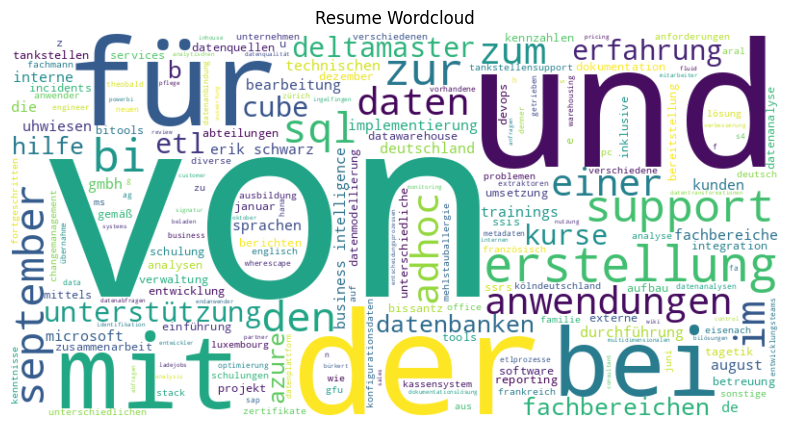

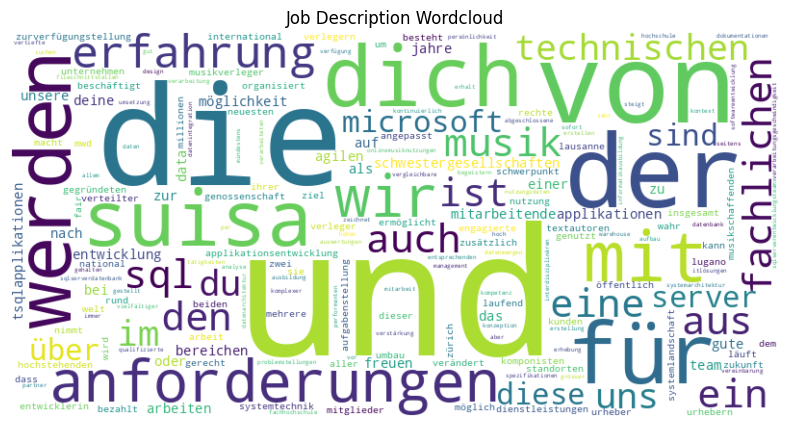

<ipython-input-34-85c9bb3ea0ed>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df[:20], palette='viridis')


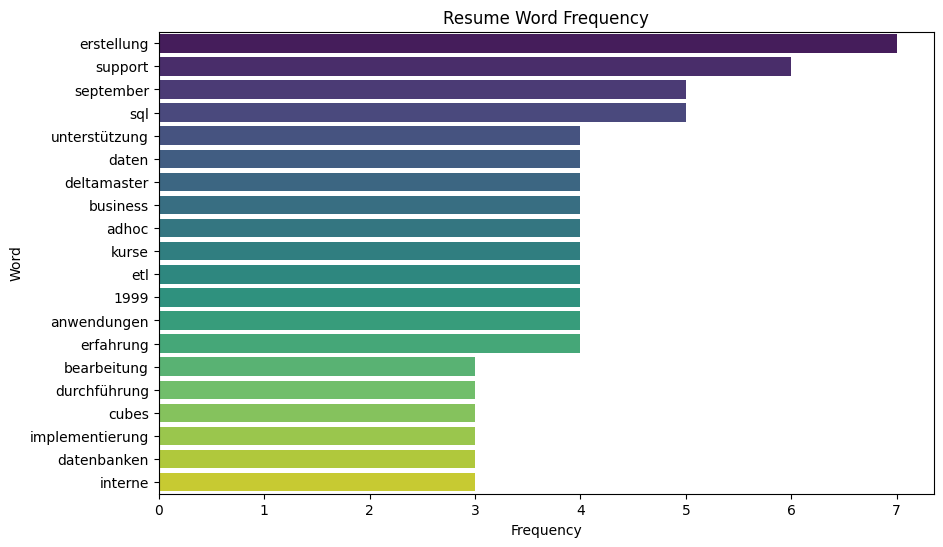

<ipython-input-34-85c9bb3ea0ed>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df[:20], palette='viridis')


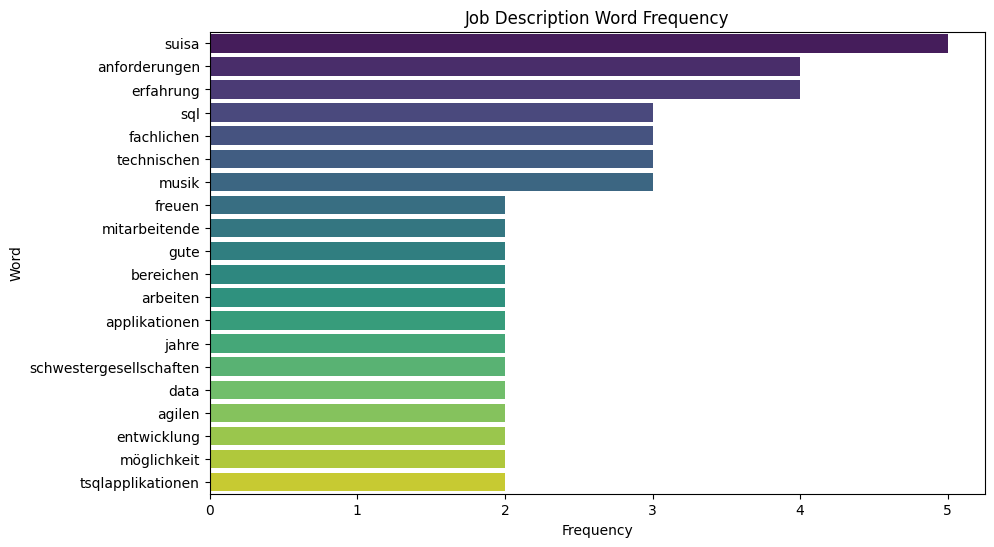

Cosine Similarity between Resume and Job Description: 0.6797547284749195


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


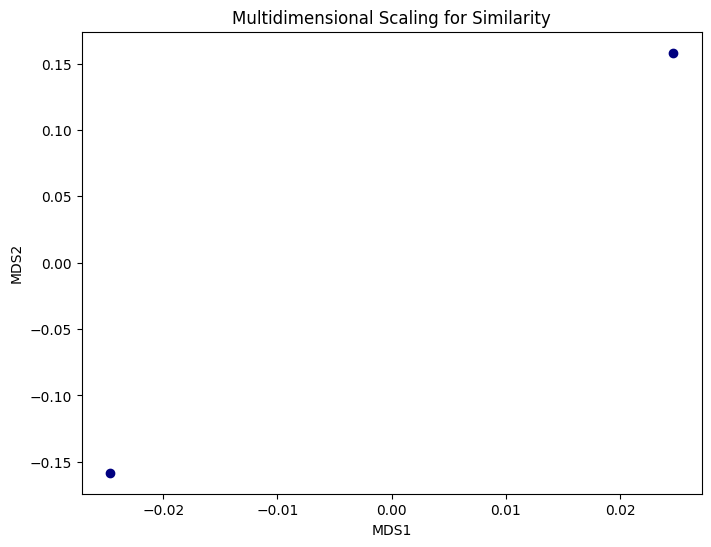

In [34]:
# Importieren der erforderlichen Bibliotheken
import os
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Laden von Textdateien für Lebenslauf und Stellenbeschreibung
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

resume_text = load_text('/content/lebenslauf.txt')
job_description_text = load_text('/content/stellenbeschreibung.txt')
#kenntnisse_text = load_text('/content/kenntnisse.txt')

# Funktion zur Bereinigung von Text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Entfernen von überflüssigen Leerzeichen
    text = re.sub(r'[^\w\s]', '', text)  # Entfernen von Sonderzeichen
    text = text.lower()  # Umwandlung in Kleinbuchstaben
    return text

# Text bereinigen
resume_text = clean_text(resume_text)
job_description_text = clean_text(job_description_text)

# Tokenisierung und Entfernung von Stoppwörtern
stop_words = set(stopwords.words('german'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

resume_tokens = tokenize_and_remove_stopwords(resume_text)
job_description_tokens = tokenize_and_remove_stopwords(job_description_text)

# Erstellung von Wordclouds für Lebenslauf und Stellenbeschreibung
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(resume_text, 'Resume Wordcloud')
generate_wordcloud(job_description_text, 'Job Description Wordcloud')

# Analyse der Häufigkeit von Wörtern im Lebenslauf und in der Stellenbeschreibung
def word_frequency(tokens):
    word_freq = Counter(tokens)
    return word_freq

resume_word_freq = word_frequency(resume_tokens)
job_description_word_freq = word_frequency(job_description_tokens)

# Funktion zur Visualisierung von Wortfrequenzen als Bar-Chart
def plot_word_frequency(word_freq, title):
    df = pd.DataFrame.from_dict(word_freq, orient='index').reset_index()
    df = df.rename(columns={'index':'Word', 0:'Frequency'})
    df = df.sort_values(by='Frequency', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df[:20], palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_word_frequency(resume_word_freq, 'Resume Word Frequency')
plot_word_frequency(job_description_word_freq, 'Job Description Word Frequency')

# Vergleich der Übereinstimmung zwischen Lebenslauf und Stellenbeschreibung
def calculate_cosine_similarity(text1, text2):
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    similarity = cosine_similarity(vectors)
    return similarity[0][1]

similarity_score = calculate_cosine_similarity(resume_text, job_description_text)
print("Cosine Similarity between Resume and Job Description:", similarity_score)

# Interaktive Visualisierung der Ähnlichkeit mit MDS
def plot_mds_similarity(text1, text2):
    vectorizer = CountVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    similarities = 1 - cosine_similarity(vectors)
    pos = mds.fit_transform(similarities)
    plt.figure(figsize=(8, 6))
    plt.scatter(pos[:, 0], pos[:, 1], color='navy')
    plt.title('Multidimensional Scaling for Similarity')
    plt.xlabel('MDS1')
    plt.ylabel('MDS2')
    plt.show()

plot_mds_similarity(resume_text, job_description_text)
